Notes From Udacity NLPND

## Webscraping / Cleaning

In [38]:
import requests

#Fetch a webpage
r = requests.get("https://www.udacity.com/courses/all")
#print(r.text)

In [6]:
import re

#Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('',r.text))


  
  window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o0&&(p-=1)}),s.on("internal-error",function(t){i("ierr",[t,c.now(),!0])})},{}],3:[function(t,n,e){t("loader").features.ins=!0},{}],4:[function(t,n,e){function r(t){}if(window.performance&&window.performance.timing&&window.performance.getEntriesByType){var o=t("ee"),i=t("handle"),a=t(8),s=t(7),c="learResourceTimings",f="addEventListener",u="resourcetimingbufferfull",d="bstResource",l="resource",p="-start",h="-end",m="fn"+p,w="fn"+h,v="bstTimer",y="pushState",g=t("loader");g.features.stn=!0,t(6);var b=NREUM.o.EV;o.on(m,function(t,n){var e=t[0];e instanceof b&&(this.bstStart=g.now())}),o.on(w,function(t,n){var e=t[0];e instanceof b&&i("bst",[e,n,this.bstStart,g.now()])}),a.on(m,function(t,n,e){this.bstStart=g.now(),th

In [39]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup Library
soup = BeautifulSoup(r.text, "lxml")
## print(soup.get_text())
#print(soup.prettify())

In [21]:
summaries = soup.find_all("div", class_ ="course-summary-card row row-gap-medium catalog-card nanodegree-card ng-star-inserted")

In [37]:
# Extract title
summaries[0].select_one("h3 a").get_text().strip()

'Full Stack Web Developer'

### Normalization 

* Changing text to lowercase
* Removing punctuation

In [ ]:
text = text.lower()

### Tokenization - splitting into a token or symbol which has a meaning

* Splitting the words from a sentence
* Splitting a sentence or a tweet from a document

In [ ]:
words = text.split()

In [ ]:
from nltk.tokenize import words_tokenize
word = word_tokenize(text)

In [ ]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)

### Stopwords Removal

In [ ]:
from nltk.corpus import stopwords
words = [ w for w in words if w not in stopwords.words("english") ]

### Part-of-Speech Tagging

In [7]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('averaged_perceptron_tagger')

sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Named Entity Recognition - 
* are typically noun phrases that refer to some specific object,preson or place
* It is often used to index and search for news articles for example for companies of intrest

In [8]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
ne_chunk(pos_tag(word_tokenize("Anotnio joined Udacity Inc. in California")))

LookupError: 

===========================================================================
NLTK was unable to find the gs file!
Use software specific configuration paramaters or set the PATH environment variable.
===========================================================================

Tree('S', [Tree('PERSON', [('Anotnio', 'NNP')]), ('joined', 'VBD'), Tree('ORGANIZATION', [('Udacity', 'NNP'), ('Inc.', 'NNP')]), ('in', 'IN'), Tree('GPE', [('California', 'NNP')])])

### Not a priority - Issue to be Fixed Issue with ne_chunk as chunker is tries to use ghostscript to draw a parse tree of the sentence
https://stackoverflow.com/questions/36942270/nltk-was-unable-to-find-the-gs-file

* install ghostscript
* this line of code will search for "gswin64c.exe" in the environment variable PATH, however, the ghostscript installer does not add the binary to PATH, so for this to work, you'll need to find where ghostscript is installed and add the /bin subfolder to PATH.

### Stemming & Lemmitization

***Stemming*** - is a very fast and crude method (with very simplistic rules) of reducing a word to its root form For example - reading becomes read, cached, caching becomes cache but some are not very good like people becoming peopl.

NLTK PorterStemmer, SnowballStemmer and other language specific stemmers. We simply need to pass one word at a time.



In [15]:
from nltk.stem.porter import PorterStemmer

words = ["I","going","park","parking","my","awesomely","happening","car","tested","not","boring","ones","dreams"]
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['I', 'go', 'park', 'park', 'my', 'awesom', 'happen', 'car', 'test', 'not', 'bore', 'one', 'dream']


***Lemmitization***  - 
It uses a dictionary to map different variants of a word back to its root.
eg: {be: is, was, were}
Lemmitizing may be a memory intensive than Stemming as Lemmetization uses a dictionary   

***Lemmitizing with Parts of SpeechPoS***


In [19]:
#Lemmetizing verbs
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in words]
print(lemmed)

['I', 'go', 'park', 'park', 'my', 'awesomely', 'happen', 'car', 'test', 'not', 'bore', 'ones', 'dream']


***It is common to apply Lemmitization first and then Stemming or use either one of them***

## SPAM Classifier with Naive Bayes

In [2]:
# Refer C:\Users\Nitin\Documents\GitHub\Notes\NLP Udacity

## HMM Tagger (Hidden Markov Model Tagger)

In [3]:
# Refer C:\Users\Nitin\Documents\GitHub\Notes\NLP Udacity

# Bag of Words & Cosine Similarity

Value is  1   for similar vectors;
          0   for orthogonal vectors;
         -1   for opposite vectors;
         
So, the values range from 1(most similar) to -1 (most dissimilar)

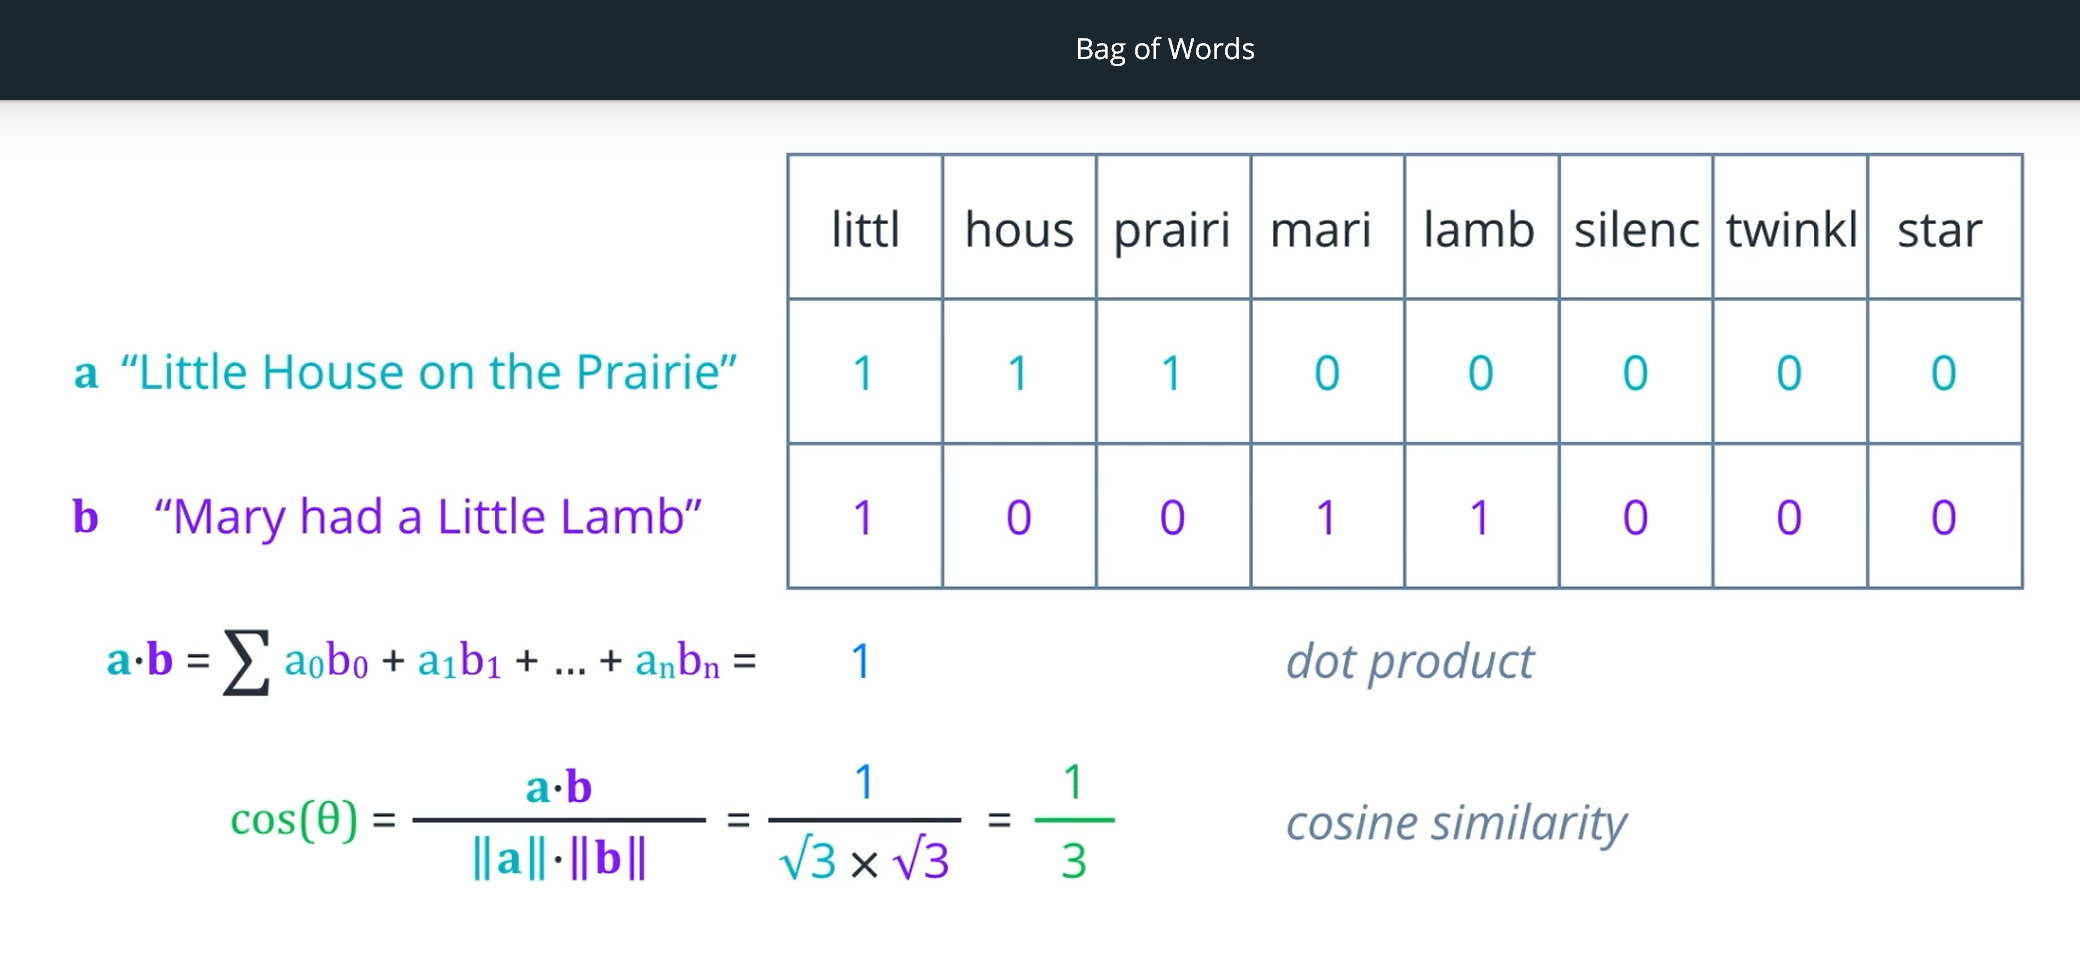

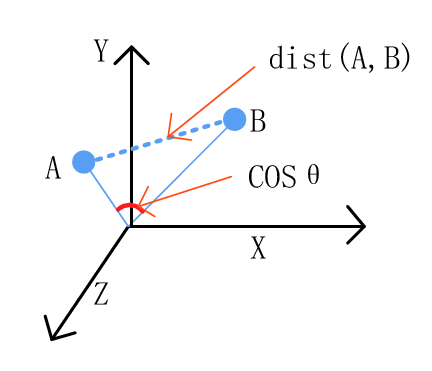

# TFIDF

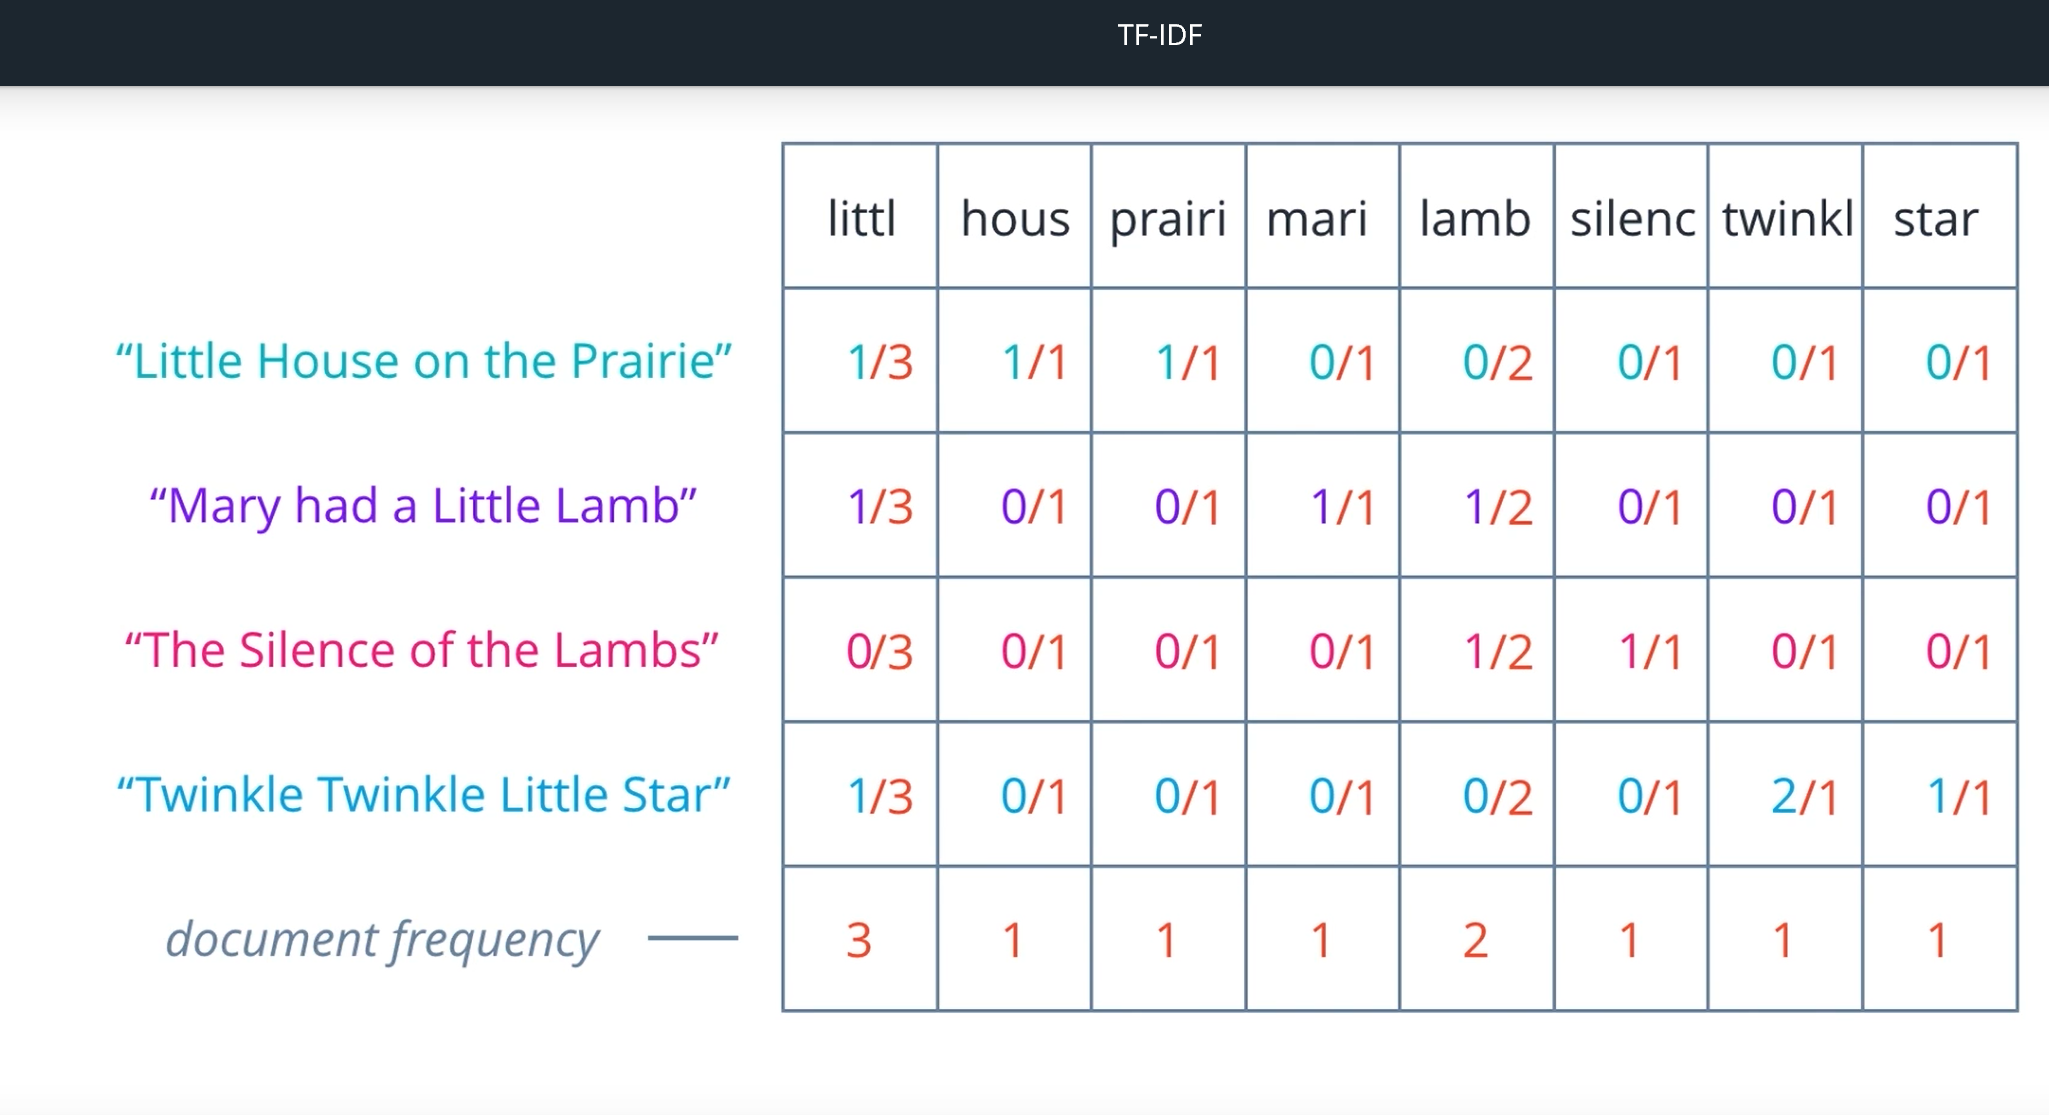

# Word Embeddings

## Word2Vec
- Continous BOW - where neighbouring words are given and missing word is predicted in a sentence
- Skip-gram - where given a word, the words around it are predicted


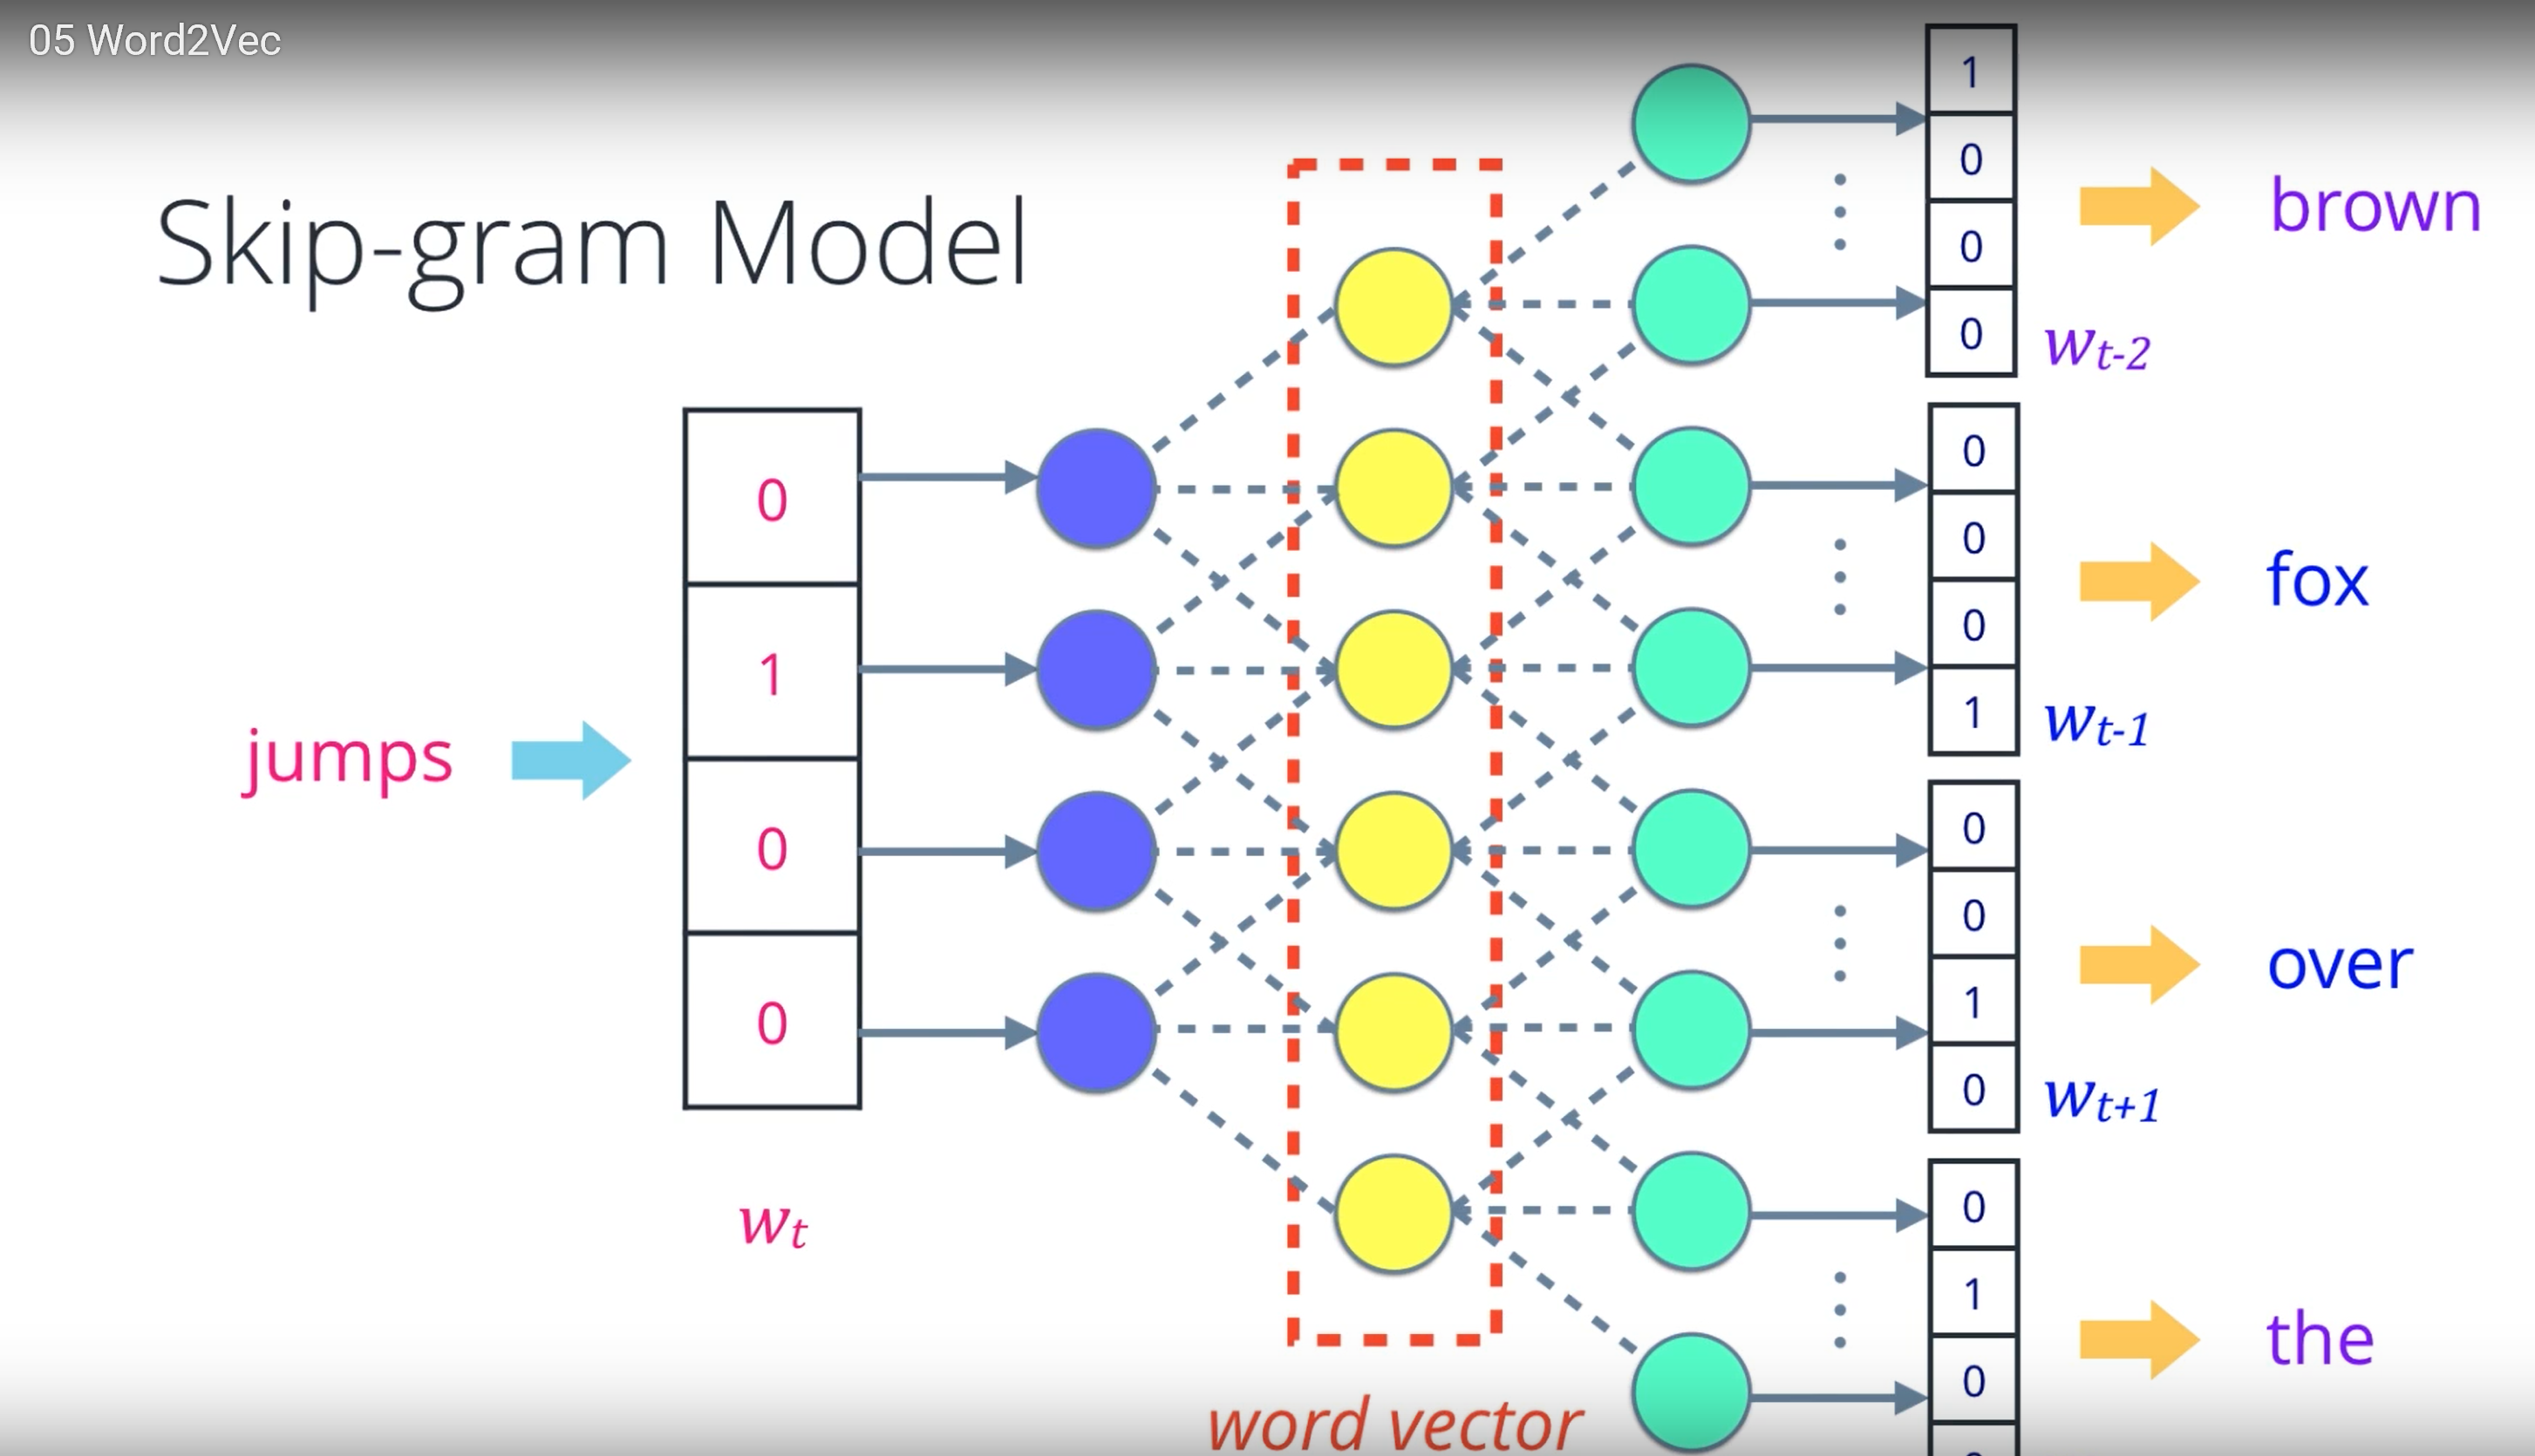

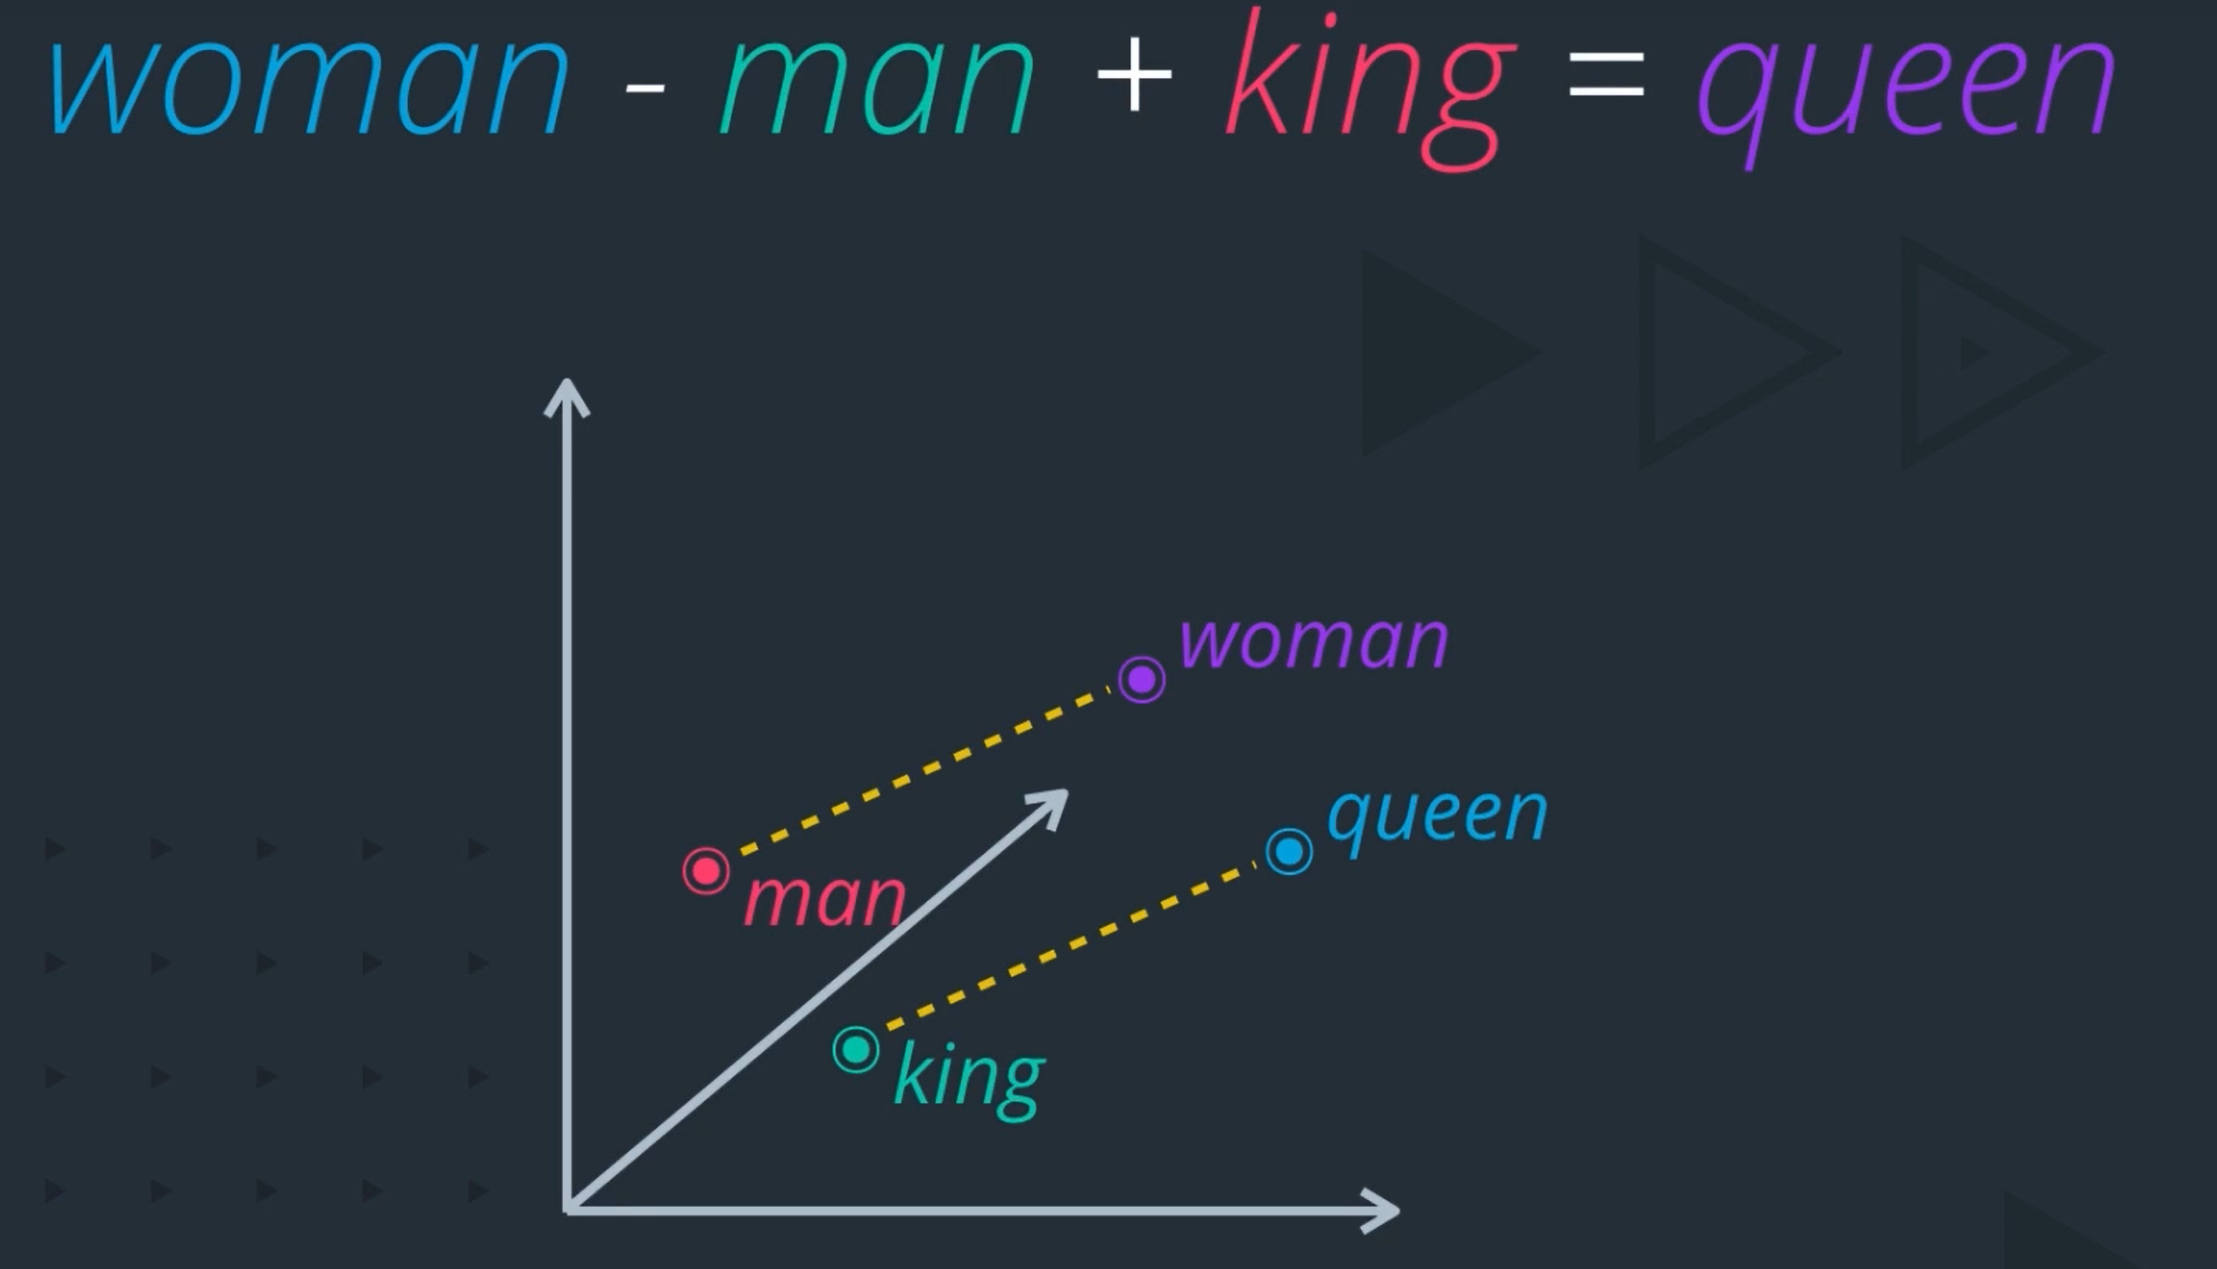

## GLOVE 
Global Vectors for Word Representation  - is based on Co-occurence probabilities

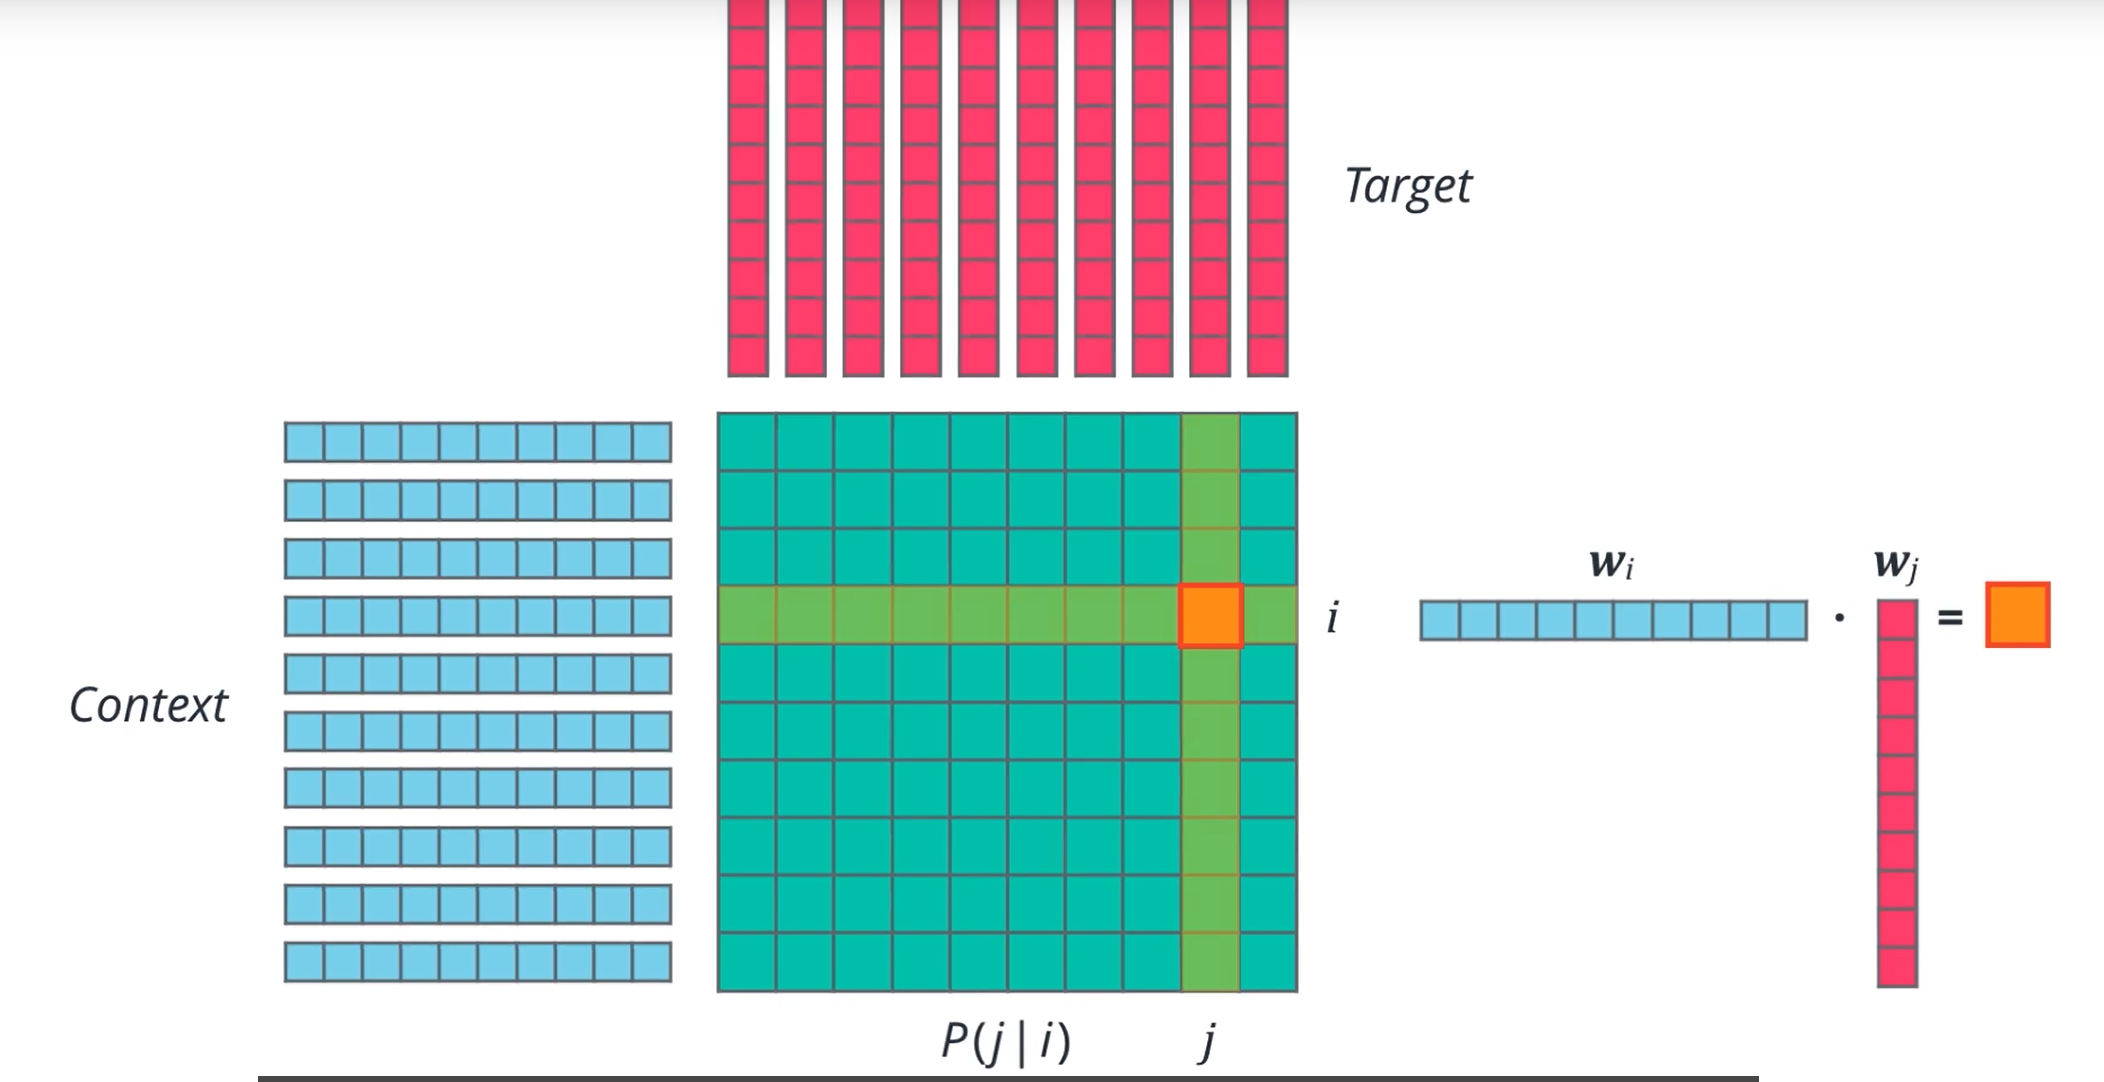

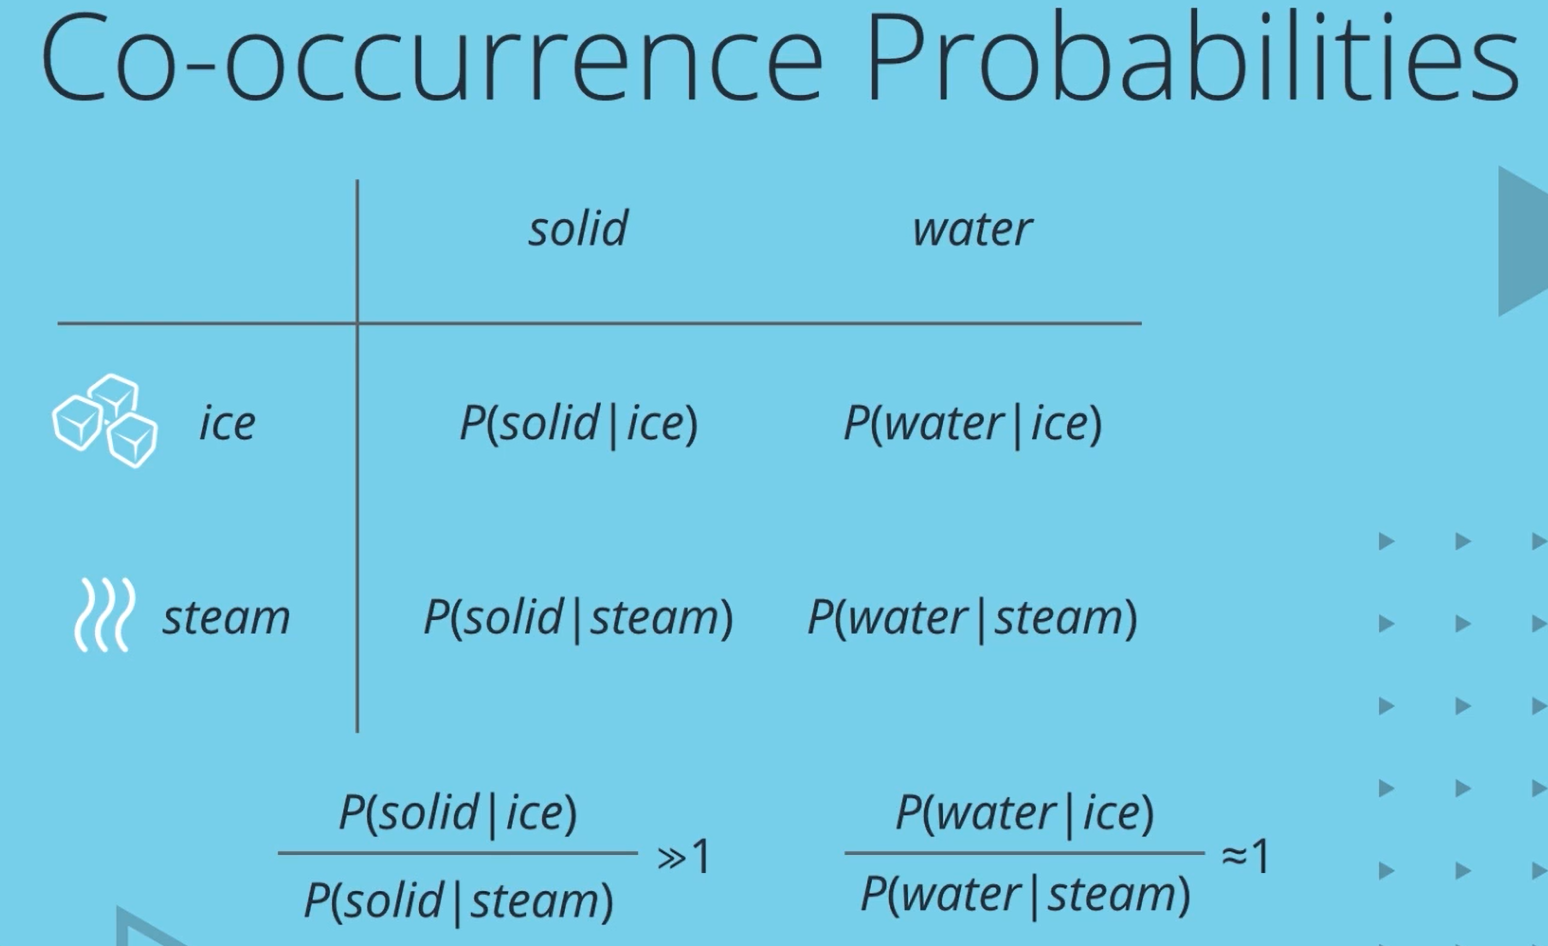

# Topic Modelling

- alpha         - (topic distribution) what articles are associated with this topic
- beta          - (word distribution)what words are associated to these topics
- theta and phi - multivariate distirbtions drawn from above 2. 
- z             - z are the topics and w ar the documents obtained by combining these two.    


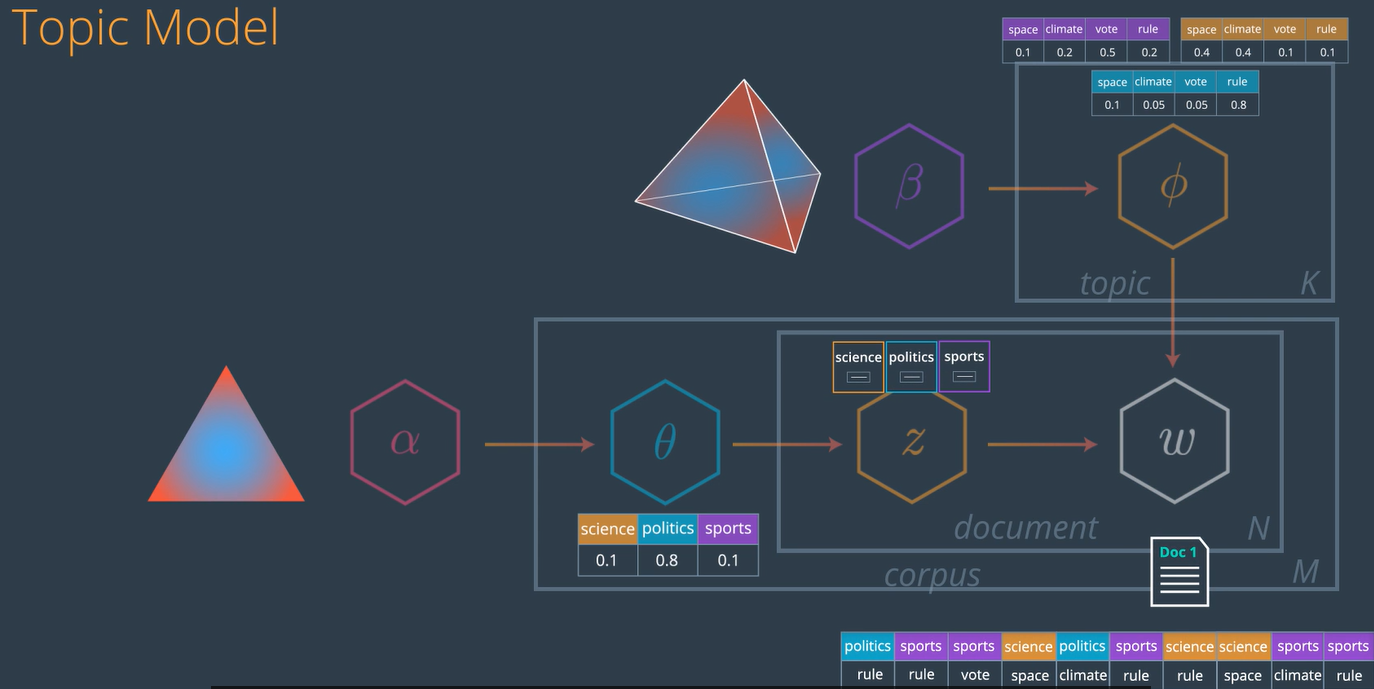

Explaining theta and phi-  Theta generates a distribtion of topics (how many- by using poissions coefficient which is out of scope). And then using phi disibution words are assigned to each topic to create Fake ocument 1.
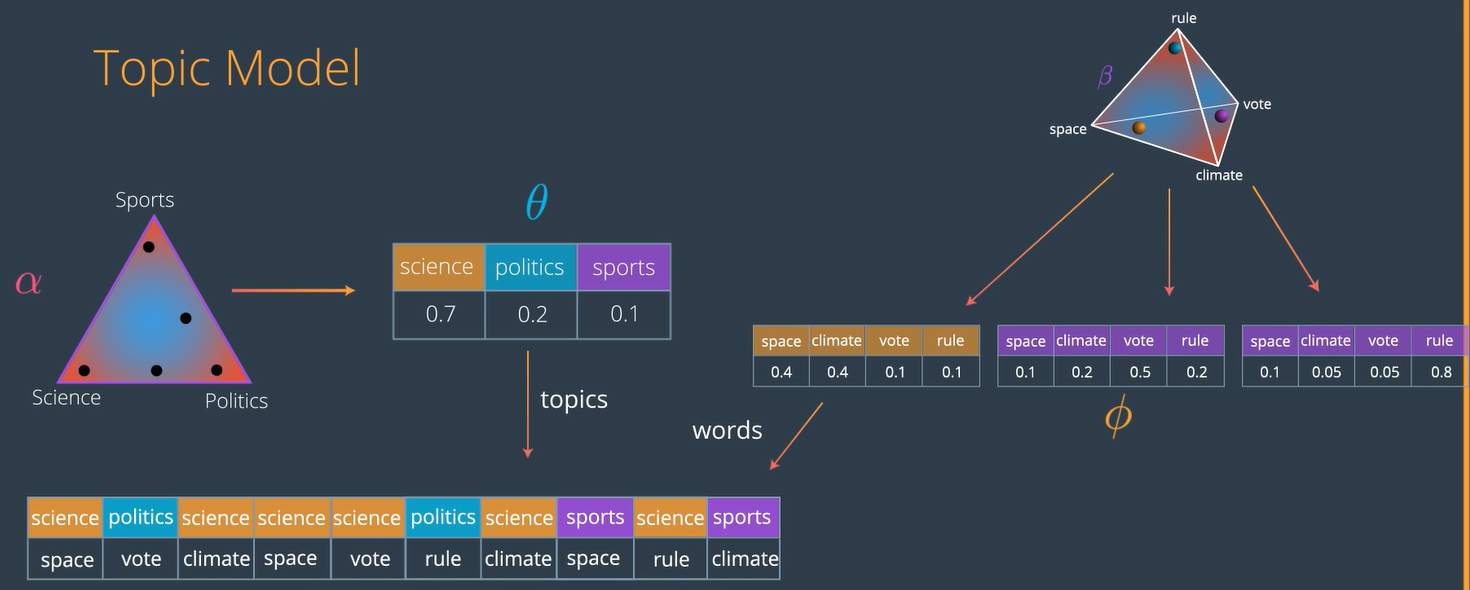

***Latent Dirichlet Allocation***

LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

- Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
- LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial.
- It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution.

# Task - Get count of words from a document

## Method1

In [152]:
import pandas as pd
import re

dataset = pd.read_csv("abcnews-date-text.csv", usecols=["headline_text"])
dataset = dataset[:2]
sample_data =dataset["headline_text"][0]
token = (re.sub('[^a-zA-Z]',' ',dataset['headline_text'][i])).lower().split()

dataset.headline_text.loc[1]
 

'act fire witnesses must be aware of defamation'

In [153]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(0,len(dataset)):
    token = (re.sub('[^a-zA-Z]',' ',dataset['headline_text'][i])).lower().split()
    token = [word for word in token if not word in set(stopwords.words('english'))]
    #token = [ps.stem(word) for word in token if not word in set(stopwords.words('english'))]
    #review = ' '.join(token)
    corpus.append(token)
corpus[1]

['act', 'fire', 'witnesses', 'must', 'aware', 'defamation']

In [154]:
from collections import Counter
my_counter = Counter()
for word in corpus:
    my_counter.update(word)
my_counter.most_common(8)

[('aba', 1),
 ('decides', 1),
 ('community', 1),
 ('broadcasting', 1),
 ('licence', 1),
 ('act', 1),
 ('fire', 1),
 ('witnesses', 1)]

## Method2

In [149]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess

dataset = pd.read_csv("abcnews-date-text.csv", usecols=["headline_text"])
dataset = dataset[:2]
sample_data =dataset["headline_text"][0]

data_tokenized = []
for token in list(gensim.utils.simple_preprocess(sample_data)):
    data_tokenized.append(token)

print(data_tokenized)
print('\n'+ dataset.headline_text.loc[1])


['aba', 'decides', 'against', 'community', 'broadcasting', 'licence']

act fire witnesses must be aware of defamation


In [160]:
corpus2 = []
for i in range(0,len(dataset)):
    for token in gensim.utils.simple_preprocess(dataset['headline_text'][i]):
        tokenized_docs = [] ### FIX BUG  :(
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            tokenized_docs.append(token)
    tokenized_docs = [word for word in tokenized_docs]
    corpus2.append(tokenized_docs)

In [161]:
from collections import Counter
my_counter = Counter()
for word in corpus2:
    my_counter.update(word)
my_counter.most_common(8)

[('licence', 1), ('defamation', 1)]

In [162]:
dataset.headline_text.loc[0]

'aba decides against community broadcasting licence'

In [163]:
dataset.headline_text.loc[1]

'act fire witnesses must be aware of defamation'

In [164]:
corpus2

[['licence'], ['defamation']]